Instrucciones del proyecto
1. Prepara los datos

1.1. Abre los archivos y examina los datos.

Ruta de acceso a los archivos:

/datasets/gold_recovery_train.csv
/datasets/gold_recovery_test.csv
/datasets/gold_recovery_full.csv

1.2. Comprueba que el cálculo de la recuperación sea correcto. Calcula la recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento. Encuentra el EAM entre tus cálculos y los valores de la característica. Facilita los resultados.

1.3. Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

1.4. Realiza el preprocesamiento de datos.

2. Analiza los datos

2.1. Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

2.2. Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

2.3. Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. ¿Observas algún valor anormal en la distribución total? Si es así, ¿merece la pena eliminar esos valores de ambas muestras? Describe los resultados y elimina las anomalías.

3. Construye el modelo

3.1. Escribe una función para calcular el valor final de sMAPE.

3.2. Entrena diferentes modelos. Evalúalos aplicando la validación cruzada. Elige el mejor modelo y pruébalo utilizando la muestra de prueba. Facilita los resultados.

Utiliza estas fórmulas para las métricas de evaluación:

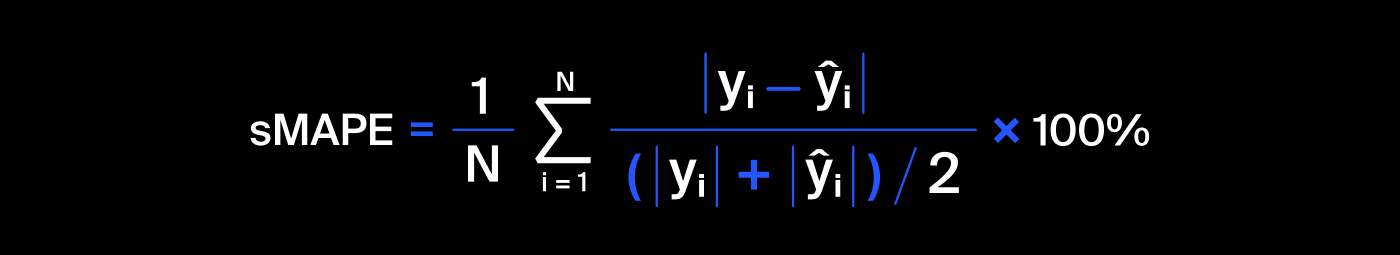

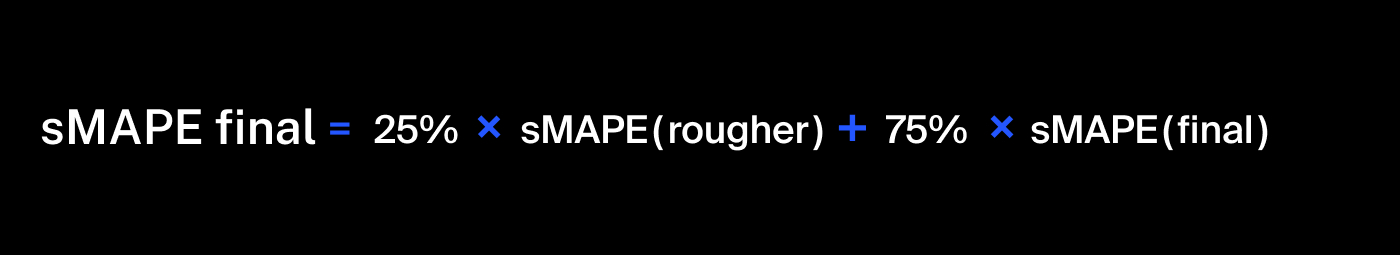

Evaluación del proyecto
Hemos definido los criterios de evaluación para el proyecto. Léelos con atención antes de pasar al ejercicio.

Esto es lo que los revisores buscarán cuando evalúen tu proyecto:

* ¿Has preparado y analizado los datos adecuadamente?
* ¿Qué modelos has desarrollado?
* ¿Cómo has comprobado la calidad del modelo?
* ¿Has seguido todos los pasos de las instrucciones?
* ¿Has respetado la estructura del proyecto y explicado los pasos realizados?
* ¿Cuáles son tus hallazgos?
* ¿Has mantenido el código limpio y has evitado su duplicación?

Ya tienes las hojas informativas y los resúmenes de los capítulos anteriores, así que ya puedes empezar.

¡Buena suerte!

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Preparar los datos

## Abrir los archivos y examinar los datos

In [23]:
url_1 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_13/data/gold_recovery_full.csv"
url_2 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_13/data/gold_recovery_test.csv"
url_3 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_13/data/gold_recovery_train.csv"

In [24]:
def explorar_dataset(df):
    """
    Explora un DataFrame mostrando información clave.

    Esta función imprime: información general del DataFrame (df.info()),
    sus dimensiones (df.shape), las primeras 15 filas (df.head(15)),
    estadísticas descriptivas (df.describe()), el conteo de valores nulos
    (df.isnull().sum()) y el conteo de filas duplicadas (df.duplicated().sum()).

    Parámetros:
        df (pd.DataFrame): El DataFrame a explorar.
    """
    print('---' * 10, '\n', f'Información del dataframe')
    print(df.info())
    print('---' * 10, '\n', f'Dimensiones del dataframe')
    print(df.shape)
    print('---' * 10, '\n', f'Valores nulos del dataframe')
    print(df.isnull().sum() / len(df) * 100)
    print('---' * 10, '\n', f'Valores duplicados del dataframe')
    print(df.duplicated().sum())
    print('---' * 10)

In [25]:
gold_recovery_full = pd.read_csv(url_1)
gold_recovery_test = pd.read_csv(url_2)
gold_recovery_train = pd.read_csv(url_3)

In [26]:
explorar_dataset(gold_recovery_full)

------------------------------ 
 Información del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail

In [27]:
explorar_dataset(gold_recovery_test)

------------------------------ 
 Información del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floa

In [28]:
explorar_dataset(gold_recovery_train)

------------------------------ 
 Información del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail

## Rougher.output.recovery calculo y EAM

In [29]:
def recovery(C, F, T):
  recovery = (C * (F - T)) / (F * (C - T)) * 100

  recovery[recovery < 0] = np.nan
  recovery[recovery > 100] = np.nan

  return recovery


![image](https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/DS_sprint_10/ES/moved_10.3.2.3ES.png)

Donde:

-   **C:**
    -   Para saber la recuperación del concentrado rougher  **→**  la proporción de oro en el concentrado justo después de la flotación o
    -   Para saber la recuperación del concentrado final  **→**  la proporción de oro después de la purificación.
-   **F:**
    -   Para saber la recuperación del concentrado rougher  **→**  la proporción de oro en la alimentación antes de la flotación
    -   Para saber la recuperación del concentrado final  **→**  la proporción de oro en el concentrado justo después de la flotación.
-   **T:**
    -   Para saber la recuperación del concentrado rougher  **→**  la proporción de oro en las colas rougher justo después de la flotación.
    -   Para saber la recuperación del concentrado final  **→**  la proporción de oro después de la purificación.

In [30]:
C_ror = gold_recovery_full['rougher.output.concentrate_au']
F_ror = gold_recovery_full['rougher.input.feed_au']
T_ror = gold_recovery_full['rougher.output.tail_au']

In [31]:
df_aem = pd.DataFrame()
df_aem['rougher.output.recovery.calculated'] = recovery(C_ror, F_ror, T_ror)

In [32]:
df_aem['rougher.output.recovery'] = gold_recovery_full['rougher.output.recovery']

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
df_aem.fillna(0, inplace=True)

In [35]:
mae = mean_absolute_error(df_aem['rougher.output.recovery'], df_aem['rougher.output.recovery.calculated'])
print(f"El error absoluto medio (MAE) es: {mae}")

El error absoluto medio (MAE) es: 8.497257797509997e-15


## Analizar las caracteristicas no disponibles en el conjunto de prueba

In [36]:
columns_test = gold_recovery_test.columns
columns_train = gold_recovery_train.columns

In [37]:
columns_full = gold_recovery_full.drop(columns=columns_test)

In [38]:
columns_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                                22635 non-null  float64


## Preprocesamiento de datos

In [39]:
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'])
gold_recovery_test['date'] = pd.to_datetime(gold_recovery_test['date'])
gold_recovery_train['date'] = pd.to_datetime(gold_recovery_train['date'])

In [40]:
from scipy.stats import normaltest

In [41]:
def fill_nas(df):
    columns = [n for n in df.columns if df[n].dtype == "float64"]

    alpha = 0.05

    for column in columns:
        stat, p = normaltest(df[column])

        if p > alpha:
            df.fillna({column: df[column].mean()}, inplace=True)
        else:
            df.fillna({column: df[column].mean()}, inplace=True)

    return df

In [42]:
fill_nas(gold_recovery_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
